_____
# Предобработка данных

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# функция для подсчета дубликатов и получения общих сведений о датасете
def get_info(data):
    display(data.head())
    print()
    print('Число дубликатов:', data.duplicated().sum())
    print()
    data.info()

In [4]:
#выведем данные датасета data на экран
get_info(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1



Число дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#выведем данные датасета orders на экран
get_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Число дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
#выведем данные датасета visitors на экран
get_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Число дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Исходя из данных следует провести следующую обработку: 

- в датафреймах data и orders привести названия колонок к нижнему регистру
- в датафреймах orders и visitors привести колонку 'date' к типу date 

In [7]:
#приведем названия колонок к нижнему регистру 
data.columns = [x.lower() for x in data.columns]
data.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [8]:
#приведем названия колонок к нижнему регистру 
orders.columns = [x.lower() for x in orders.columns]
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
#изменим тип данных колонок 'date'
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

orders.info()
print('__________')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
__________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
#посмотрим размер групп в A/B тесте
print('Размер групп A и В: \n', orders['group'].value_counts() + visitors['group'].value_counts())

Размер групп A и В: 
 B    671
A    588
Name: group, dtype: int64


In [11]:
#посмотрим попадают ли какие либо пользователи в обе группы одновременно
duplicated_orders = orders['visitorid'].loc[orders['group'] == 'A']
orders['visitorid'].loc[(orders['group'] == 'B') & (orders['visitorid'].isin(duplicated_orders))].nunique()

58

In [12]:
print('Дата окончания теста:', pd.to_datetime(orders['date']).dt.date.max())
print('Дата начала теста:', pd.to_datetime(orders['date']).dt.date.min())

Дата окончания теста: 2019-08-31
Дата начала теста: 2019-08-01


#### Конец раздела  
Предобработка данных завершена 

____


# Часть 1. Приоритизация гипотез

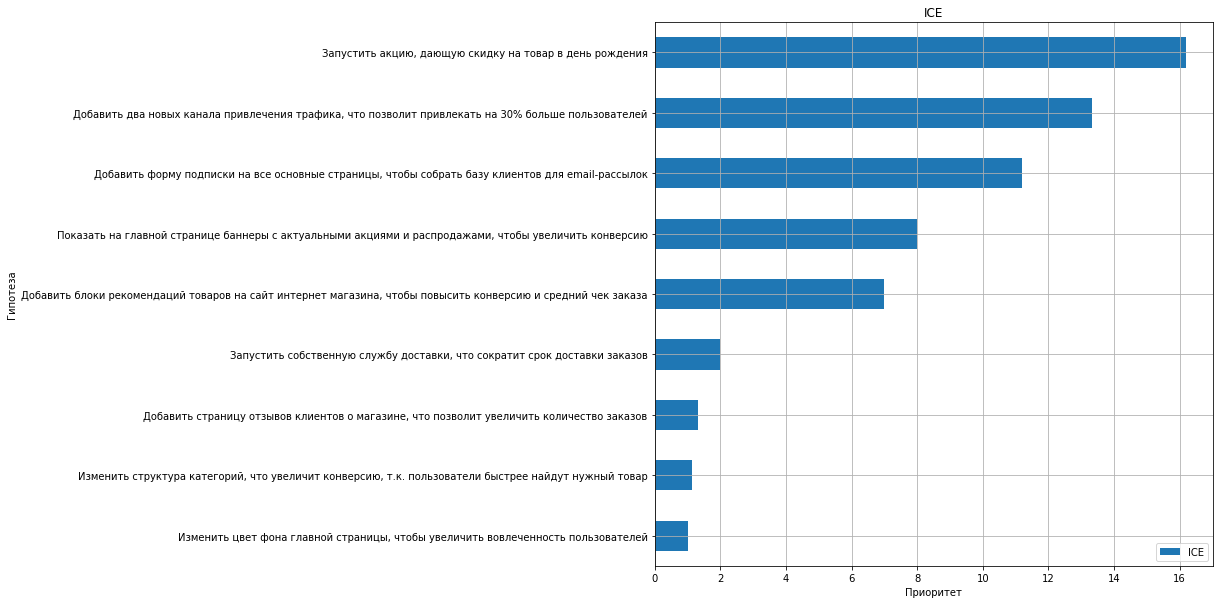

In [14]:
#для наглядного отображения построим график ICE 
ice_plot = data[['hypothesis', 'ICE']].set_index('hypothesis').sort_values(by='ICE', ascending=True).plot(kind='barh', figsize=(10,10), grid=True)
ice_plot.set_xlabel('Приоритет')
ice_plot.set_ylabel('Гипотеза')
ice_plot.set_title('ICE')
plt.show()

Промежуточный вывод по ICE: 

Приоритетнее всего является задача 8: Запустить акцию дающую скидку на товар"  
Наименнее приоритетная задача - 4: "Изменить цвет фона главной страницы"

In [15]:
#применим фреймворк RICE и выведем его на экран
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


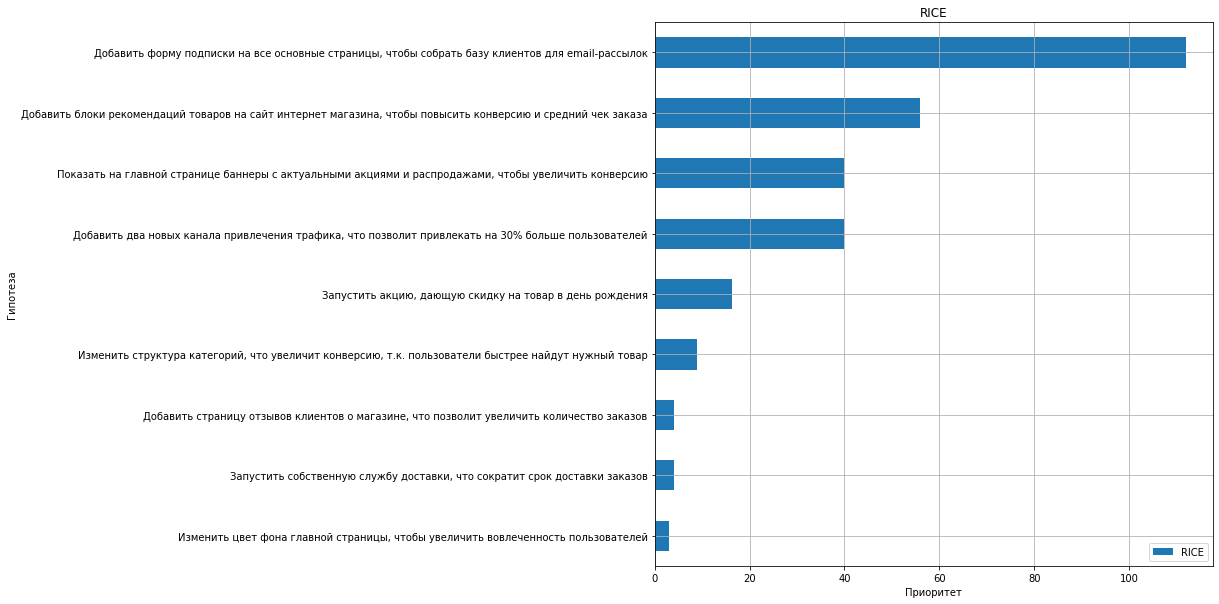

In [16]:
#для наглядного отображения построим график RICE 
rice_plot = data[['hypothesis', 'RICE']].set_index('hypothesis').sort_values(by='RICE', ascending=True).plot(kind='barh', figsize=(10,10), grid=True)
rice_plot.set_xlabel('Приоритет')
rice_plot.set_ylabel('Гипотеза')
rice_plot.set_title('RICE')
plt.show()

Промежуточный вывод по RICE:

Приоритетнее всего является задача 7: "Добавить форму подписки на все основные страницы"   
Наименнее приоритетная задача, по прежнему - 4: "Изменить цвет фона главной страницы"


### Выводы Части 1:

По фреймворку ICE наибольшую оценку имели гпиотезы 8,0 и 7. После применения фреймворка RICE приоритеты изменились на гпиотезы 7,2 и 0. Это объясняется тем, что в случае фреймворка ICE, в отличие от RICE, мы не учитывали охват изменений, тогда как это важная составляющая оценки гипотез.

В нашем случае наиболее приоритетными гипотезами будут 7, 2, 0.
____


# Часть 2. Анализ A/B-теста

Выведем данные второй части проекта

In [17]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Подготовка данных к анализу


_____
Подготовим данные для дальнейшей работы и расчетов
____


In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max',
         'group' : 'max',
         'transactionid' : 'nunique',
         'visitorid' : 'nunique',
         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])



In [21]:
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [22]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max',
          'group' : 'max',
          'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [23]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [24]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


____

### Задача 1 

Расчет кумулятивной выручки по группам.



In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [26]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [28]:
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


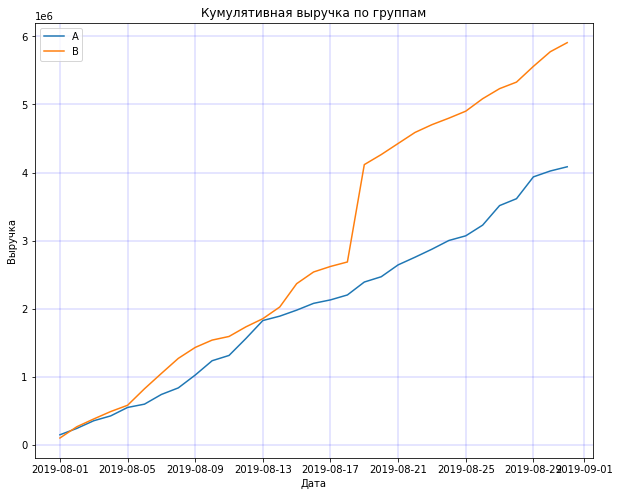

In [29]:
#задаем параметры графика
plt.figure(figsize=(10, 8))
plt.grid(color='blue', linestyle='-', linewidth=0.2)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')



# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
#plt.show()

#### Вывод по Задаче 1

Выручка планомерно растет, как группе А, так и в группе В, но только до 17 августа, после чего в группе В происходит резкий всплеск, который может быть обусловлен резким ростом числа заказов или появлением аномально дорогих заказов.

___


### Задача 2. 

Расчет кумулятивного среднего чека по группам.

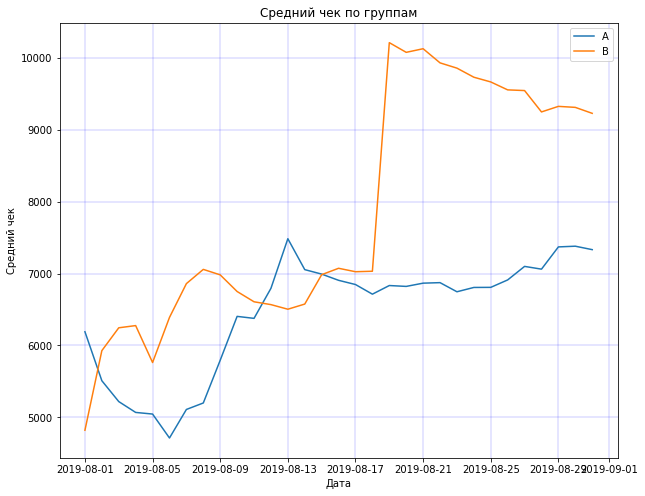

In [30]:
#задаем параметры графика
plt.figure(figsize=(10, 8))
plt.grid(color='blue', linestyle='-', linewidth=0.2)
plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

#### Вывод по Задаче 2

Происходит подобный всплеск в группе B, волатильность групп А и В просматривается на всем графике до 17 августа, после чего группа А выходит на стабильный средний чек около 7000, а в группе В наблюдается резкий всплеск на графике, что может быть обсуловлено попаданием в выборку крупных заказов. Требуется дополнительный анализ выбросов в группах.
____

### Задача 3. 

Расчет относительного изменения кумулятивного среднего чека группы B к группе A. 

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

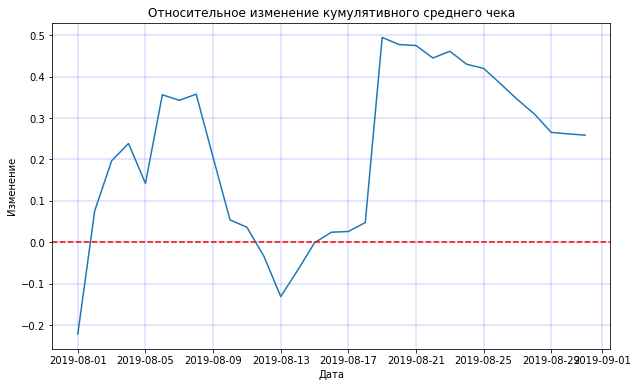

In [32]:
#задаем параметры графика
plt.figure(figsize=(10, 6))
plt.grid(color='blue', linestyle='-', linewidth=0.2)
plt.title('Относительное изменение кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Изменение')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--') 

#### Вывод по Задаче 3

В нескольких точках график различия между сегментами резко «скачет». Налицо наличие выбросов и аномальных значений, необходимо дополнительное исследование и обработка данных для их определения.
___

### Задача 4. 

Расчет кумулятивного среднего количества заказов на посетителя по группам.

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [34]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

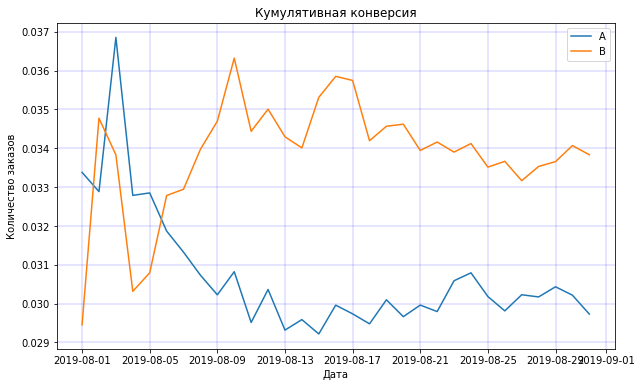

In [35]:
#задаем параметры графика
plt.figure(figsize=(10, 6))
plt.grid(color='blue', linestyle='-', linewidth=0.2)
plt.title('Кумулятивная конверсия')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

#### Вывод по Задаче 4

График кумулятивной конверсии стабилизировался к 17 августа и показывает, что Конверсия группы В стабильно выше, конверсии группы А.
___

### Задача 5. 

Расчет относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

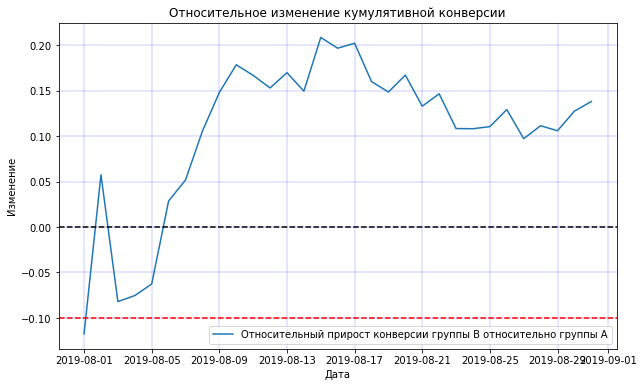

In [37]:
#задаем параметры графика
plt.figure(figsize=(10, 6))
plt.grid(color='blue', linestyle='-', linewidth=0.2)
plt.title('Относительное изменение кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Изменение')

# строим графики
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='red', linestyle='--')


#### Вывод по Задаче 5


В начале теста группа B была значительно ниже группы A, затем разница между группами резко увеличилась в сторону группы B.  
На данный момент нет основания для каких либо выводов, сперва стоит проанализировать аномалии.
___

## Проверка аномальных значений

### Задача 6. 

Построение точечного графика количества заказов по пользователям. 

In [38]:
#создадим группу 
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
#переименуем названия колонок и обо
ordersByUsers.columns = ['visitorid', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


____
Есть пользователи, которые совершали 5, 8, 9 и 11 заказов.
____

Text(0, 0.5, 'Количество заказов')

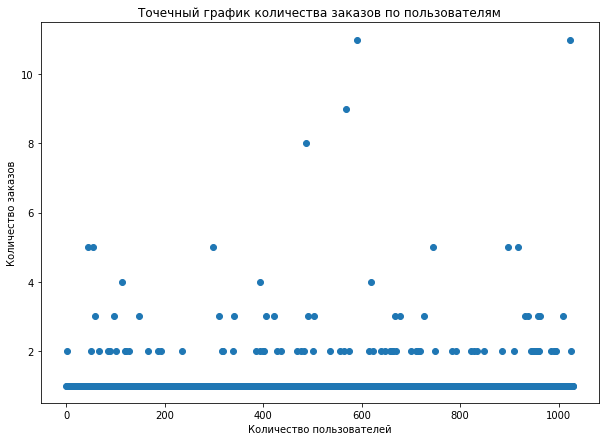

In [39]:
plt.figure(figsize=(10, 7))
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

#### Вывод по Задаче 6

Судя по полученным данным в основном пользователи размещали один заказ, есть более значительное количество двух и трех заказов пользователей, но также есть такие пользователи, кто делал три, четыре, пять, и, даже одинадцать заказов.
___

### Задача 7. 

Подсчет 95-й и 99-й перцентилей количества заказов на пользователя.

In [40]:
#посчитаем 95, 98 и 99 перцентиль методом np.percentile
display(np.percentile(ordersByUsers['orders'], [95, 98, 99])) 

array([2., 3., 4.])

#### Вывод по Задаче 7

Как показал результат проверки на долю элементов выборки, 2 заказа встречается в выборке не более чем у 5% пользователей, 4 заказа не более чем у 1% пользователей 

Определим 3 заказа пользователя (98-й перцентиль) как нижнюю границу числа заказов и отсеем аномальных пользователей по ней.
___


### Задача 8. 


Построение точечного графика стоимостей заказов.

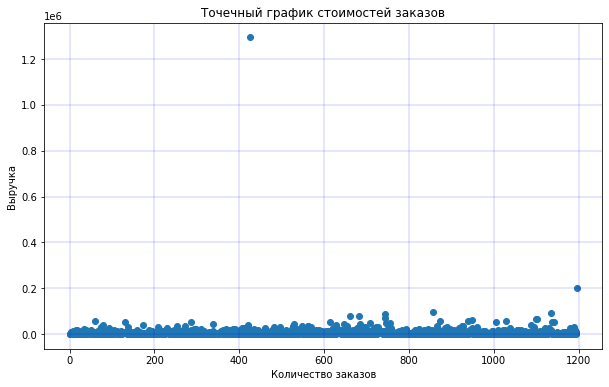

In [41]:
#задаем параметры графика
plt.figure(figsize=(10, 6))
plt.grid(color='blue', linestyle='-', linewidth=0.2)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Выручка')

# построим точечную диаграмму стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

#### Вывод по Задаче 8

На графике мы можем наблюдать аномальные выбросы в районе 200.000 и 1.300.000 рублей.
___


### Задача 9. 

Подсчет 95-й и 99-й перцентилей количества заказов на пользователя.

In [42]:
#посчитаем 95 и 99 перцентиль методом np.percentile
display(np.percentile(orders['revenue'], [95, 99])) 

array([28000. , 58233.2])

#### Вывод по Задаче 9

Не более 5% заказов дороже 28 000 рублей и не более 1% заказов дороже 58 233 рублей.

99% заказов меньше суммы 58233.2, установим этот порог в качестве границы для аномалий.

___

### Задача 10.

Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

In [43]:
#выполним подготовку данных

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 




,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [44]:
#Создадим переменные ordersByUsersA и ordersByUsersB

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userid', 'orders']

In [45]:
#Объявим переменные sampleA и sampleB
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Сформулируем гипотезы:

Нулевая гипотеза Н0 - статистически значимых различий в среднем чеке между группами нет.

Альтернативная гипотеза Н1 - статистически значимые различия в среднем чеке между группами есть.

Зададим уровень значимости alpha = 5% 

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [46]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


#### Вывод по Задаче 10

P-value меньше alpha, поэтому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. По «сырым» данным различия в конверсии групп A и B есть. Относительная разница группы А и B = 13.8%

___

### Задача 11.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза Н0 - статистически значимых различий в среднем чеке между группами нет.

Альтернативная гипотеза Н1 - статистически значимые различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. Также найдём относительные различия в среднем чеке между группами:

In [47]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


#### Вывод по Задаче 11

P-value гораздо больше alpha, поэтому поэтому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами принимаем. С другой стороны относительная разница группы А и B довольно велика и равна 25%. Налицо ошибка второго рода и ложнонегативный результат. Наблюдаемое различие не значимо и получено случайно из-за единичных выбросов.
____


### Задача 12.

Посчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Аномальные пользователи, исходя из анализа точечных графиков количества заказов и выручки по пользователям - те кто совершил от 3 заказов или совершил заказ дороже 58233.2 рублей. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 58000 рублей — usersWithExpensiveOrders. 

Объединим их в таблице abnormalUsers. 

In [48]:
#узнаем, сколько всего аномальных пользователей атрибутом shape

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userid'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [49]:
print('Всего аномальных пользователей:', abnormalUsers.shape[0]) 

Всего аномальных пользователей: 20


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

Нулевая гипотеза Н0 - статистически значимых различий в среднем чеке между группами нет.

Альтернативная гипотеза Н1 - статистически значимые различия в среднем чеке между группами есть.

In [50]:
#подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [51]:
#применим статистический критерий Манна-Уитни к полученным выборкам
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.014
Относительный показатель 'B' и 'A' = 0.151


#### Вывод по Задаче 12

P-value меньше alpha, поэтому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. По «очищенным» данным различия в конверсии групп A и B есть. Относительная разница группы А и B = 15.1%

### Задача 13.

Посчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза Н0 - статистически значимых различий в среднем чеке между группами нет.

Альтернативная гипотеза Н1 - статистически значимые различия в среднем чеке между группами есть.

In [52]:
#проверим произошло ли изменение по среднему чеку
print('alpha =', 0.05)

print('p-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

alpha = 0.05
p-value = 0.959
Относительный показатель 'B' и 'A' = -0.014


#### Вывод по Задаче 13

P-value гораздо больше alpha, поэтому поэтому нулевую гипотезу о том, что статистически значимых различий в конверсии между группами принимаем. Средний чек группы B оказался на 1.4% ниже среднего чека группы A, в то время как по "сырым" данным он был больше на 25% - на разницу повлияли аномально большие заказы.
___

# Общий вывод 

В результате проведенного анализа можно заключить, что:

- Есть статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;
- Различие по среднему чеку между группами по «сырым» данным не является статистически значимым и вызвано аномальными значениями, по данным после фильтрации аномалий статистически значимого различия по среднему чеку нет;
- Относительная разница в конверсии группы B к группе А по «сырым» данным 13.8 %.
- Относительная разница в конверсии группы B к группе А по «очищенным» данным 17,4 %.
- Средний чек по "сырым" данным средний чек группы B значительно выше среднего чека группы A и составляет 25%, что обусловлено аномальными значениями в группе. Средний чек по "очищенным" данным показал, что средний чек группы B ниже среднего чека группы А на 1.4%. 

Заключение:  
Несмотря на то, что после обработки аномальных значений средний чек группы В оказался незначительно ниже группы А, конверсия же группы В как по "сырым" так и по "очищенным" данным значительно выше конверсии группы А, иходя из чего можно принять решение остановить тест и признать его успешным - группа В показала себя лучше группы А.  
В дальнейшем рекомендуется провести мероприятия по повышению среднего чека группы В. 

# Чек-лист готовности проекта

## Предобработка данных 

- [x]  открыт файл
- [x]  файлы изучены
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему



## Исследование 

### Часть 1

- [x]  Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x]  Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- [x]  Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


### Часть 2 

- [x] Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- [x] Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- [x]  Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- [x]  Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- [x]  Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- [x]  Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- [x]  Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- [x]  Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- [x]  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- [x]  Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- [x]  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- [x]  Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- [x]  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

## Выводы

- [x]  Все исследования сформированы и объединены в общем выводе